###                                              KRISH BALAR 
###                                               SHAPE AI (Capstone project) 

# **CHRONIC KIDNEY DISEASE PREDICTION**

In [66]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [67]:
#importing data set using pandas
from google.colab import files 
uploaded = files.upload()
import io
d_ckd = pd.read_csv('ckd.csv', error_bad_lines=False)

print(d_ckd.shape)
d_ckd.head()

Saving ckd.csv to ckd.csv
(397, 26)


b'Skipping line 71: expected 26 fields, saw 27\nSkipping line 74: expected 26 fields, saw 27\nSkipping line 371: expected 26 fields, saw 27\n'


,id,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd



# **DATA PREPARATION**

In [68]:
d_ckd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       397 non-null    int64 
 1   'age'    397 non-null    object
 2   'bp'     397 non-null    object
 3   'sg'     397 non-null    object
 4   'al'     397 non-null    object
 5   'su'     397 non-null    object
 6   'rbc'    397 non-null    object
 7   'pc'     397 non-null    object
 8   'pcc'    397 non-null    object
 9   'ba'     397 non-null    object
 10  'bgr'    397 non-null    object
 11  'bu'     397 non-null    object
 12  'sc'     397 non-null    object
 13  'sod'    397 non-null    object
 14  'pot'    397 non-null    object
 15  'hemo'   397 non-null    object
 16  'pcv'    397 non-null    object
 17  'wbcc'   397 non-null    object
 18  'rbcc'   397 non-null    object
 19  'htn'    397 non-null    object
 20  'dm'     397 non-null    object
 21  'cad'    397 non-null    object
 22  'a

In [69]:
d_ckd.columns

Index(['id', ''age'', ''bp'', ''sg'', ''al'', ''su'', ''rbc'', ''pc'', ''pcc'',
       ''ba'', ''bgr'', ''bu'', ''sc'', ''sod'', ''pot'', ''hemo'', ''pcv'',
       ''wbcc'', ''rbcc'', ''htn'', ''dm'', ''cad'', ''appet'', ''pe'',
       ''ane'', ''class''],
      dtype='object')

In [70]:
d_ckd.isnull().sum()

id         0
'age'      0
'bp'       0
'sg'       0
'al'       0
'su'       0
'rbc'      0
'pc'       0
'pcc'      0
'ba'       0
'bgr'      0
'bu'       0
'sc'       0
'sod'      0
'pot'      0
'hemo'     0
'pcv'      0
'wbcc'     0
'rbcc'     0
'htn'      0
'dm'       0
'cad'      0
'appet'    0
'pe'       0
'ane'      0
'class'    0
dtype: int64



*   NO NULL VALUES SO NO NEED FOR DATA CLEANING
*   NOW WE WILL CONTINUE WITH OTHER PREPARATION PROCESS


*   BUT THERE ARE ? INSTEAD OF NAN VALUES 
*   SO WE HAVE TO REPLACE IT





In [71]:
d_ckd.replace('?',np.NaN)

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
393,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
394,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
395,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1.0,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [72]:
Nan_columns = {"Rbc":     {"normal": 1, "abnormal": 0},
           "Pc": {"normal": 1, "abnormal": 0},
           "Pcc": {"present": 1, "notpresent": 0},
           "Ba": {"present": 1, "notpresent": 0},
           "Htn": {"yes": 1, "no": 0},
           "Dm": {"yes": 1, "no": 0},
           "Cad": {"yes": 1, "no": 0},
           "Appet": {"good": 1, "poor": 0},
           "pe": {"yes": 1, "no": 0},
           "Ane": {"yes": 1, "no": 0}}

#cleaning the NaN values
d_ckd.replace(Nan_columns, inplace=True)

# Filling the null values with mean value of the respective column

d_ckd.fillna(round(d_ckd.mean(),2), inplace=True)

print(d_ckd)

# Save this dataset as final.csv for further prediction
d_ckd.to_csv("final.csv", sep=',', index=False)

      id 'age' 'bp'   'sg' 'al' 'su'  ... 'dm' 'cad' 'appet' 'pe' 'ane' 'class'
0      1    48   80  1.020    1    0  ...  yes    no    good   no    no     ckd
1      2     7   50  1.020    4    0  ...   no    no    good   no    no     ckd
2      3    62   80  1.010    2    3  ...  yes    no    poor   no   yes     ckd
3      4    48   70  1.005    4    0  ...   no    no    poor  yes   yes     ckd
4      5    51   80  1.010    2    0  ...   no    no    good   no    no     ckd
..   ...   ...  ...    ...  ...  ...  ...  ...   ...     ...  ...   ...     ...
392  396    55   80  1.020    0    0  ...   no    no    good   no    no  notckd
393  397    42   70  1.025    0    0  ...   no    no    good   no    no  notckd
394  398    12   80  1.020    0    0  ...   no    no    good   no    no  notckd
395  399    17   60  1.025    0    0  ...   no    no    good   no    no  notckd
396  400    58   80  1.025    0    0  ...   no    no    good   no    no  notckd

[397 rows x 26 columns]




*  NOW THE DATA IS CLEANED UP AND READY FOR PROCESSING

*  FIRST WE WILL DO EXPLORATORY DATA ANALYTICS



### **EXPLORATORY DATA ANALYSIS**

In [73]:
#reading data   
da_data = pd.read_csv('cleaned_data.csv', sep= ',', header = 0)

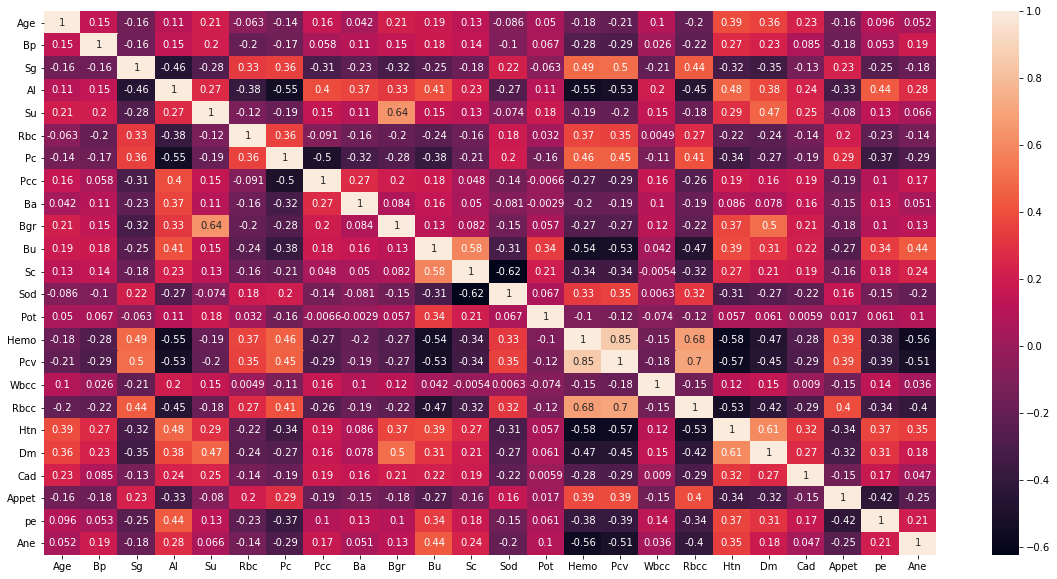

In [74]:
# Plot a heatMap
plt.figure(figsize=(20,10))
sns.heatmap(da_data.corr(),annot=True)

In [75]:
# Plot a pair plot
plt.figure(figsize=(15,20))
sns.pairplot(da_data)
plt.show()


KeyboardInterrupt: ignored

<Figure size 1080x1440 with 0 Axes>

Error in callback <function flush_figures at 0x7f1bdf0c5dd0> (for post_execute):


KeyboardInterrupt: ignored



###   **DATA PREDICTION**






*   WE ARE USING DECISION TREE TO TRAIN THE MODEL AS IT FITS THE MODEL PERFECTLY




In [76]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
 
# Function importing Dataset
def idata():
    c_data = pd.read_csv('cleaned_data.csv', sep= ',', header = 0)
     
    # Printing the dataswet shape
    print ("Dataset Lenght: ", len(c_data))
    print ("Dataset Shape: ", c_data.shape)
     
    # Printing the dataset obseravtions
    return c_data
 
# Function to split the dataset
def splitdata(c_data):
 
    # Seperating the target variable
    X = c_data.values[:, 0:24]
    Y = c_data.values[:, -1]

 
    # Spliting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
     
    return X, Y, X_train, X_test, y_train, y_test
     
# Function to perform training with giniIndex.
def train_gini(X_train, X_test, y_train):
 
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
 
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
     
# Function to perform training with entropy.
def tarin_entropy(X_train, X_test, y_train):
 
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
 
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
 
 
# Function to make predictions
def pred(X_test, clf_object):
 
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    return y_pred
     
# Function to calculate accuracy
def accuracy(y_test, y_pred):
     
    print("Confusion Matrix: \n",
    confusion_matrix(y_test,y_pred))
     
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
     
    print("Report : \n",
    classification_report(y_test, y_pred))
 
# Main code
def main():
     
    # Building Phase
    data = idata()
    X, Y, X_train, X_test, y_train, y_test = splitdata(data)
    d_gini = train_gini(X_train, X_test, y_train)
    d_entropy = tarin_entropy(X_train, X_test, y_train)
     
    # Operational Phase
    print("Results Using Gini Index:")
     
    # Prediction using gini
    y_pred_gini = pred(X_test, d_gini)
    accuracy(y_test, y_pred_gini)
     
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = pred(X_test, d_entropy)
    accuracy(y_test, y_pred_entropy)
     
     
# Calling main function
if __name__=="__main__":
    main()

Dataset Lenght:  400
Dataset Shape:  (400, 25)
Results Using Gini Index:
Confusion Matrix: 
 [[77  3]
 [ 1 39]]
Accuracy :  96.66666666666667
Report : 
               precision    recall  f1-score   support

         ckd       0.99      0.96      0.97        80
      notckd       0.93      0.97      0.95        40

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120

Results Using Entropy:
Confusion Matrix: 
 [[77  3]
 [ 1 39]]
Accuracy :  96.66666666666667
Report : 
               precision    recall  f1-score   support

         ckd       0.99      0.96      0.97        80
      notckd       0.93      0.97      0.95        40

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120





*  WE HAVE SUCCESSFULLY PREDICTED THE VALUE WITH THE ACCURACY OF 96.667
*  THAT IS THE END OF THE PROJECT



